In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox, filedialog
from sklearn.impute import SimpleImputer
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# Load the dataset
data = pd.read_csv("Churn_Modelling.csv")

In [50]:
# Sample of the Dataset
sample = data.head(5).to_string(index=False)
sample

' CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited\n         619 42.0       2      0.00              1        1.0             1.0        101348.88       1\n         608 41.0       1  83807.86              1        0.0             1.0        112542.58       0\n         502 42.0       8 159660.80              3        1.0             0.0        113931.57       1\n         699 39.0       1      0.00              2        0.0             0.0         93826.63       0\n         850 43.0       2 125510.82              1        NaN             1.0         79084.10       0'

In [52]:
description = "Dataset Description:\n" + data.describe().to_string()

In [53]:
# Data Preprocessing
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_variable = 'Exited'

selected_data = data[selected_features + [target_variable]]

# Normalize the input features
input_features = selected_features[:-1]
scaler = MinMaxScaler()
selected_data.loc[:, input_features] = scaler.fit_transform(selected_data[input_features])


In [54]:
# AdaBoost Learning
X = selected_data[selected_features]
y = selected_data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [56]:
clf = AdaBoostClassifier()
clf.fit(X_train_imputed, y_train)

AdaBoostClassifier()

In [57]:
# Evaluate the model
y_pred = clf.predict(X_test_imputed)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print ("The accuracy is :",accuracy )
print ("The precision is :",precision)
print ("The recall is :",recall)



The accuracy is : 0.8525737131434283
The precision is : 0.8409459096428822
The recall is : 0.8525737131434283


In [70]:
# Create the GUI
root = tk.Tk()
root.title("Bank Customer Churn Prediction")
root.configure(bg="lightgray")
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width // 2) - (800 // 2)
y = (screen_height // 2) - (600 // 2)
root.geometry(f"800x600+{x}+{y}")

''

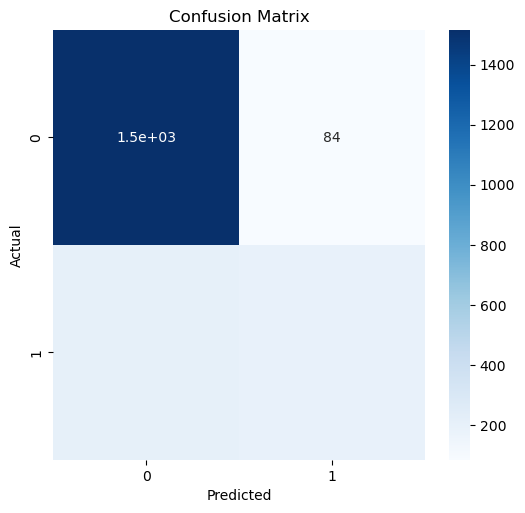

In [71]:

# Create a frame for the accuracy and confusion matrix
result_frame = tk.Frame(root)
result_frame.pack()

# Display the accuracy
accuracy_label = tk.Label(result_frame, text=f"Accuracy: {accuracy:.2f}")
accuracy_label.pack()

# Display the confusion matrix
confusion_matrix_label = tk.Label(result_frame, text="Confusion Matrix:")
confusion_matrix_label.pack()

# Create a figure and axes for the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Create a Tkinter canvas to display the confusion matrix
confusion_matrix_canvas = tk.Canvas(result_frame, width=600, height=600)
confusion_matrix_canvas.pack()

# Embed the Matplotlib figure in the Tkinter canvas
confusion_matrix_figure_canvas = FigureCanvasTkAgg(fig, confusion_matrix_canvas)
confusion_matrix_figure_canvas.draw()
confusion_matrix_figure_canvas.get_tk_widget().pack()

# Display the classification report
report_label = tk.Label(root, text="Classification Report:")
report_label.pack()
report_text = tk.Text(root, height=10, width=80)
report_text.pack()
report_text.insert(tk.END, report)

root.mainloop()

In [79]:
def preprocess_data(X):
    # Create an instance of the SimpleImputer with the desired strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the features (X) to learn the mean values for imputation
    imputer.fit(X)

    # Transform the features (X) to replace missing values with the learned means
    X_imputed = imputer.transform(X)

    return X_imputed

# GUI functions
def predict_data(filename):
    # Load the data from the file
    data = pd.read_csv(filename)

    # Separate the features (X) and target variable (y)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Preprocess the features
    X_imputed = preprocess_data(X)

    # Perform prediction using the trained model
    y_pred = clf.predict(X_imputed)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred)

    # Display the results in a separate window
    show_results(accuracy, cm, report)

def show_results(accuracy, cm, report):
    result_window = tk.Toplevel()
    result_window.title("Analysis Results")


    # Accuracy
    accuracy_label = tk.Label(result_window, text="Accuracy: {:.2f}%".format(accuracy * 100))
    accuracy_label.pack()

    # Confusion Matrix
    confusion_matrix_label = tk.Label(result_window, text="Confusion Matrix:")
    confusion_matrix_label.pack()

    confusion_matrix_canvas = tk.Canvas(result_window, width=600, height=400)
    confusion_matrix_canvas.pack()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    confusion_matrix_figure_canvas = FigureCanvasTkAgg(plt.gcf(), confusion_matrix_canvas)
    confusion_matrix_figure_canvas.draw()
    confusion_matrix_figure_canvas.get_tk_widget().pack()

    # Classification Report
    report_label = tk.Label(result_window, text="Classification Report:")
    report_label.pack()

    report_text = tk.Text(result_window, height=10, width=80)
    report_text.insert(tk.END, report)
    report_text.pack()

def select_file():
    # Open a file dialog to select a file
    filename = filedialog.askopenfilename()

    # Predict the selected file
    predict_data(filename)

root = tk.Tk()
root.title("Churn Modelling Analysis")
root.configure(bg="lightgray")
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.geometry(f"400x300+{x}+{y}")

select_button = tk.Button(root, text="Select File", command=select_file)
select_button.pack()

# Assuming you have already trained the AdaBoost classifier
clf = AdaBoostClassifier()
clf.fit(X_train_imputed, y_train)

root.mainloop()